# Experiment 20

Experiment to test the ability of GASP to separate linearly separable signals. (Update: 8/8/2024)

In [1]:
import sys
sys.path.insert(0, '../../')  

(1, 256, 1, 16, 3)


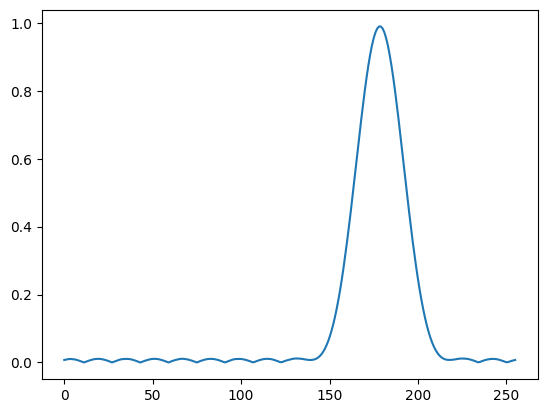

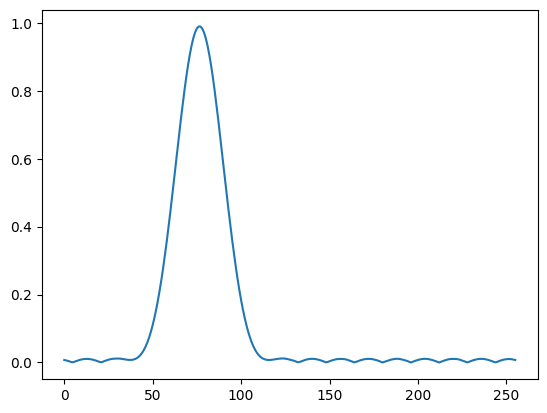

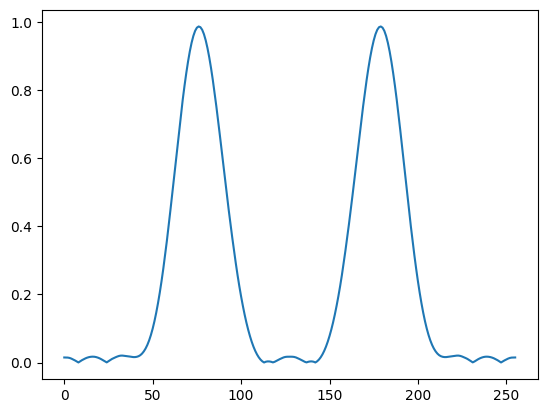

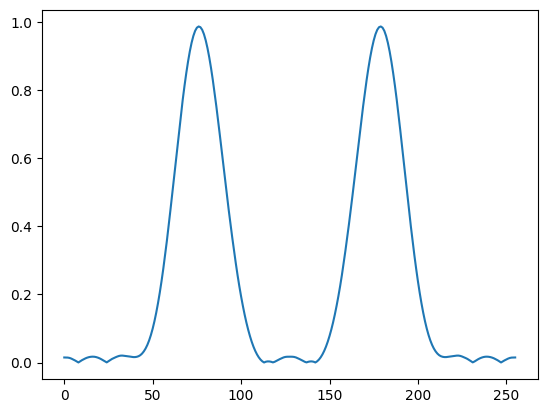

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import process_data_for_gasp, train_gasp, run_gasp, simulate_ssfp, responses

# Simulate ssfp with tissue phantom 
M = simulate_ssfp(width = 256, height = 1, npcs = 16, TRs = [5e-3, 10e-3, 20e-3], alpha = np.deg2rad(30), gradient = 2 * np.pi, phantom_type='line', phantom_padding=0)
D1 = responses.gaussian(width=256, bw=0.2, shift=0.2)
D2 = responses.gaussian(width=256, bw=0.2, shift=-0.2)
D3 = D1 + D2

print(M.shape)

# Train gasp model coefficients
data = process_data_for_gasp(M)
Ic1, An1 = train_gasp(data[0], D1)
Ic2, An2 = train_gasp(data[0], D2)
Ic3, An3 = train_gasp(data[0], D3)

An4 = An1 + An2
Ic4 = run_gasp(Mdata, An4)

# Plot results
plt.plot(np.abs(Ic1).T)
plt.show()
plt.plot(np.abs(Ic2).T)
plt.show()
plt.plot(np.abs(Ic3).T)
plt.show()
plt.plot(np.abs(Ic4).T)
plt.show()

In [3]:
An1 + An2

array([ 2.50797699e-01+1.78893358e-18j,  3.16830869e-05+2.75612866e-14j,
        6.70491262e-04-2.15105711e-15j, -3.50910900e-04+4.64905892e-15j,
        7.25702024e-04+3.48887797e-03j, -1.79361609e-03-1.26563265e-02j,
       -3.70278212e-04-2.38623312e-04j, -3.49596946e-03-8.72336915e-03j,
       -5.78746376e-03-1.58228562e-02j,  5.38464536e-03+1.40633276e-02j,
       -1.76503695e-02-2.67693262e-02j, -2.74419849e-02-4.25403469e-02j,
        5.12960861e-03+8.05814907e-03j, -1.15681095e-01-1.16009241e-01j,
       -5.04883132e-02-5.14627904e-02j,  1.45112352e-02+1.49843320e-02j,
       -2.34472253e-01-1.56024750e-01j, -8.61151164e-02-5.82998424e-02j,
        1.56583870e-02+1.06338446e-02j, -8.81905184e-02-3.47699079e-02j,
       -1.10181081e-01-4.60682669e-02j,  2.31754014e-02+9.79561762e-03j,
        3.64886203e-01+7.41843350e-02j, -1.30096161e-01-2.61022988e-02j,
        2.34159360e-02+4.71061415e-03j,  6.13065807e-01+1.53398344e-15j,
       -1.33410790e-01+9.32806892e-16j,  2.68338772